## Question 8 -
Using the data from Question 5 (westworld_episodes.csv), write code the analyze the data and answer the following questions

#### Note -

Draw plots to demonstrate the analysis for the following questions and better visualizations
Write code comments wherever required for code understanding

#### Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [1]:
## required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast

In [2]:
df = pd.read_csv("episode.csv")
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,summary,medium_image,original_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [3]:
df.shape

(36, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36 non-null     int64  
 1   url             36 non-null     object 
 2   name            36 non-null     object 
 3   season          36 non-null     int64  
 4   number          36 non-null     int64  
 5   type            36 non-null     object 
 6   airdate         36 non-null     object 
 7   airtime         36 non-null     object 
 8   airstamp        36 non-null     object 
 9   runtime         36 non-null     int64  
 10  rating          36 non-null     float64
 11  summary         36 non-null     object 
 12  medium_image    36 non-null     object 
 13  original_image  36 non-null     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.1+ KB


In [5]:
df.isnull().sum()

id                0
url               0
name              0
season            0
number            0
type              0
airdate           0
airtime           0
airstamp          0
runtime           0
rating            0
summary           0
medium_image      0
original_image    0
dtype: int64

### Prob_1: Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [20]:
season_rating = df.groupby('season')['rating'].count()

<AxesSubplot:xlabel='season'>

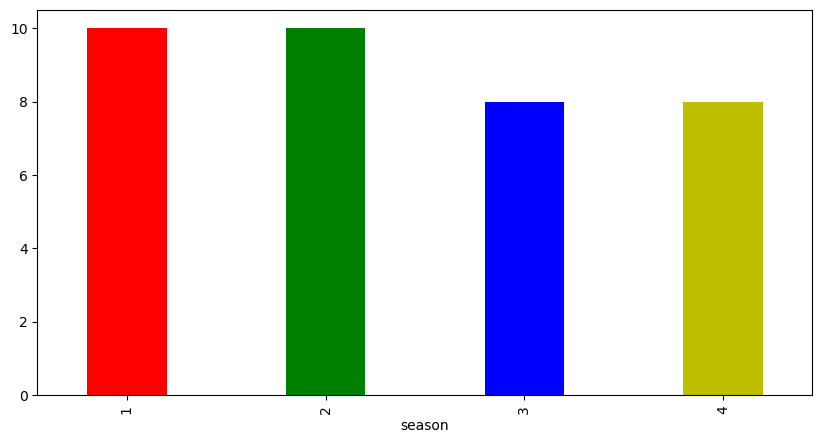

In [21]:
season_rating.plot(kind='bar', figsize=(10, 5), width=0.4, color=['r','g','b','y'])

### Prob_2: Get all the episode names, whose average rating is more than 8 for every season.

In [52]:
df_prob2 = df[df['rating'] > 8]

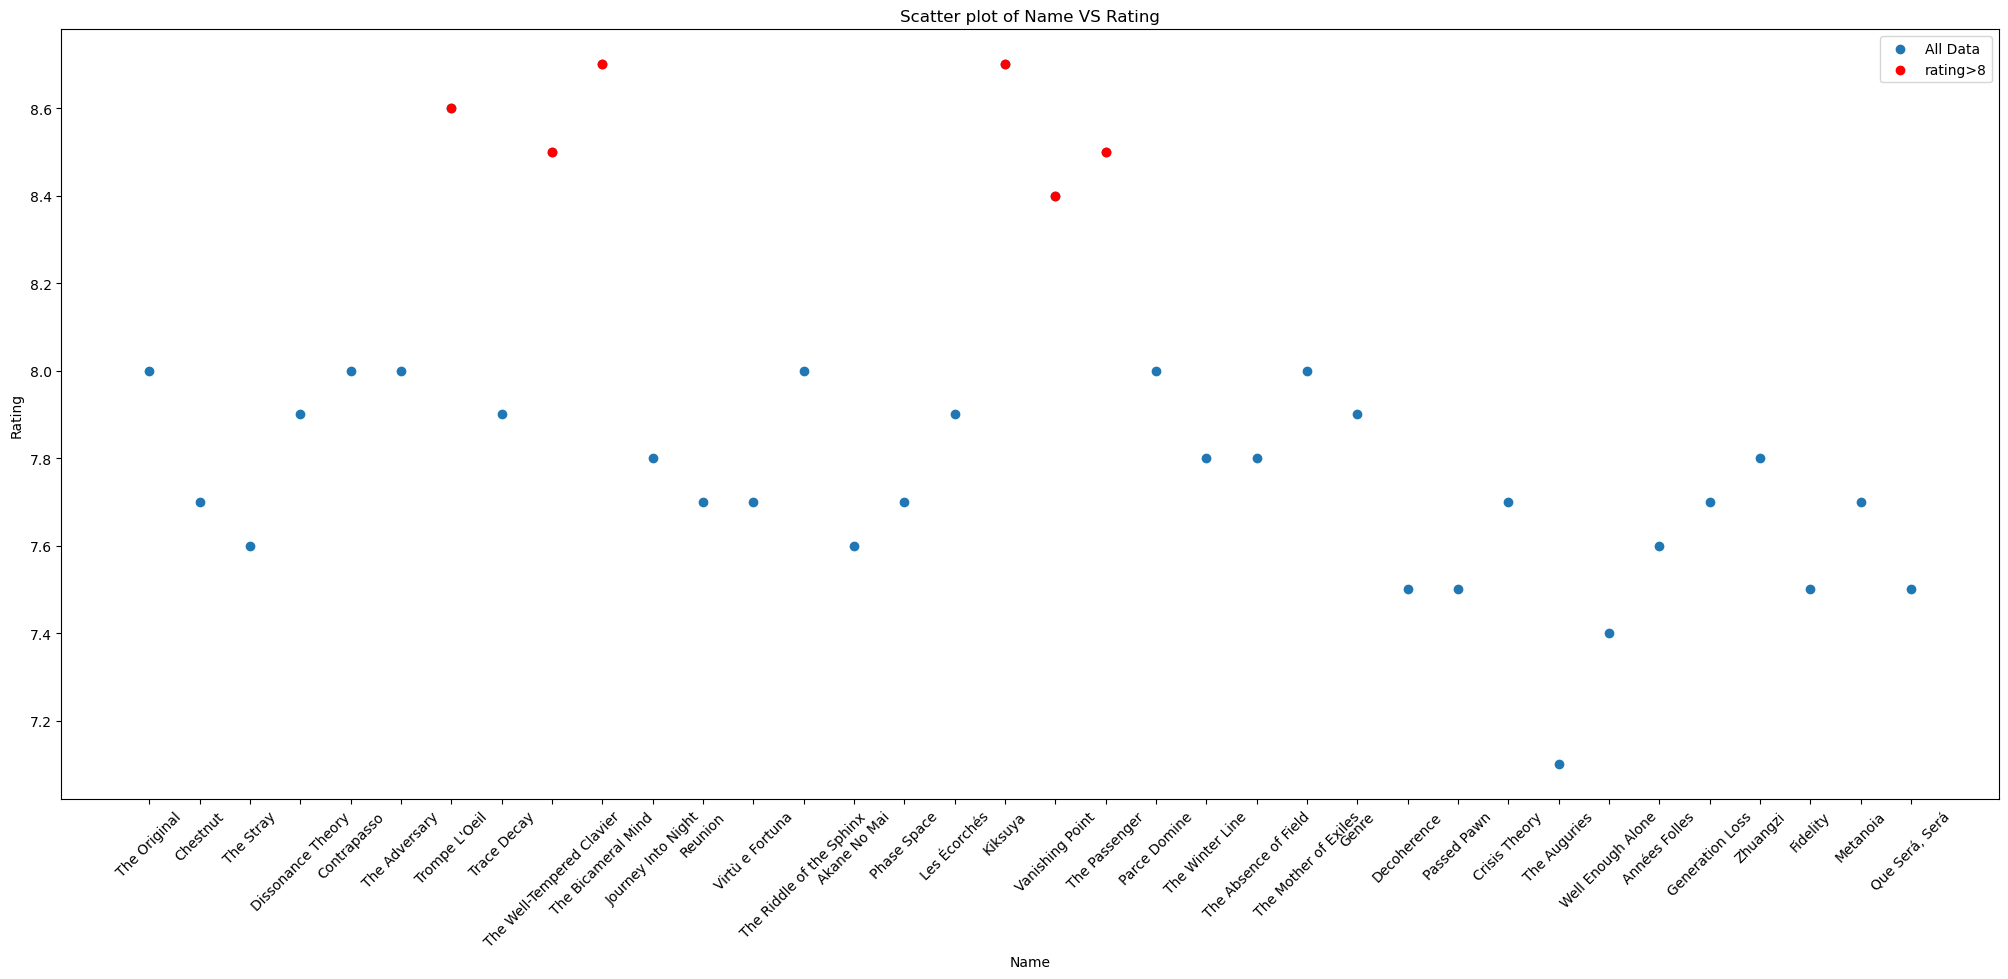

In [54]:
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['rating'], label='All Data')
plt.scatter(df_prob2['name'], df_prob2['rating'], color='red', label='rating>8')
plt.xlabel('Name')
plt.ylabel('Rating')
plt.title('Scatter plot of Name VS Rating')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [55]:
df_prob2[['name','rating']]

,name,rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


#### Conclusion
There are total 6 episodes whose rating is more than 8

### Prob_3: Get all the episode names that aired before May 2019

In [56]:
df['airdate'] = pd.to_datetime(df['airdate'])

In [58]:
df['air_year'] = df['airdate'].dt.year

In [70]:
df_prob3 = df[df['air_year'] < 2019]

In [71]:
df['air_year'].unique()

array([2016, 2018, 2020, 2022], dtype=int64)

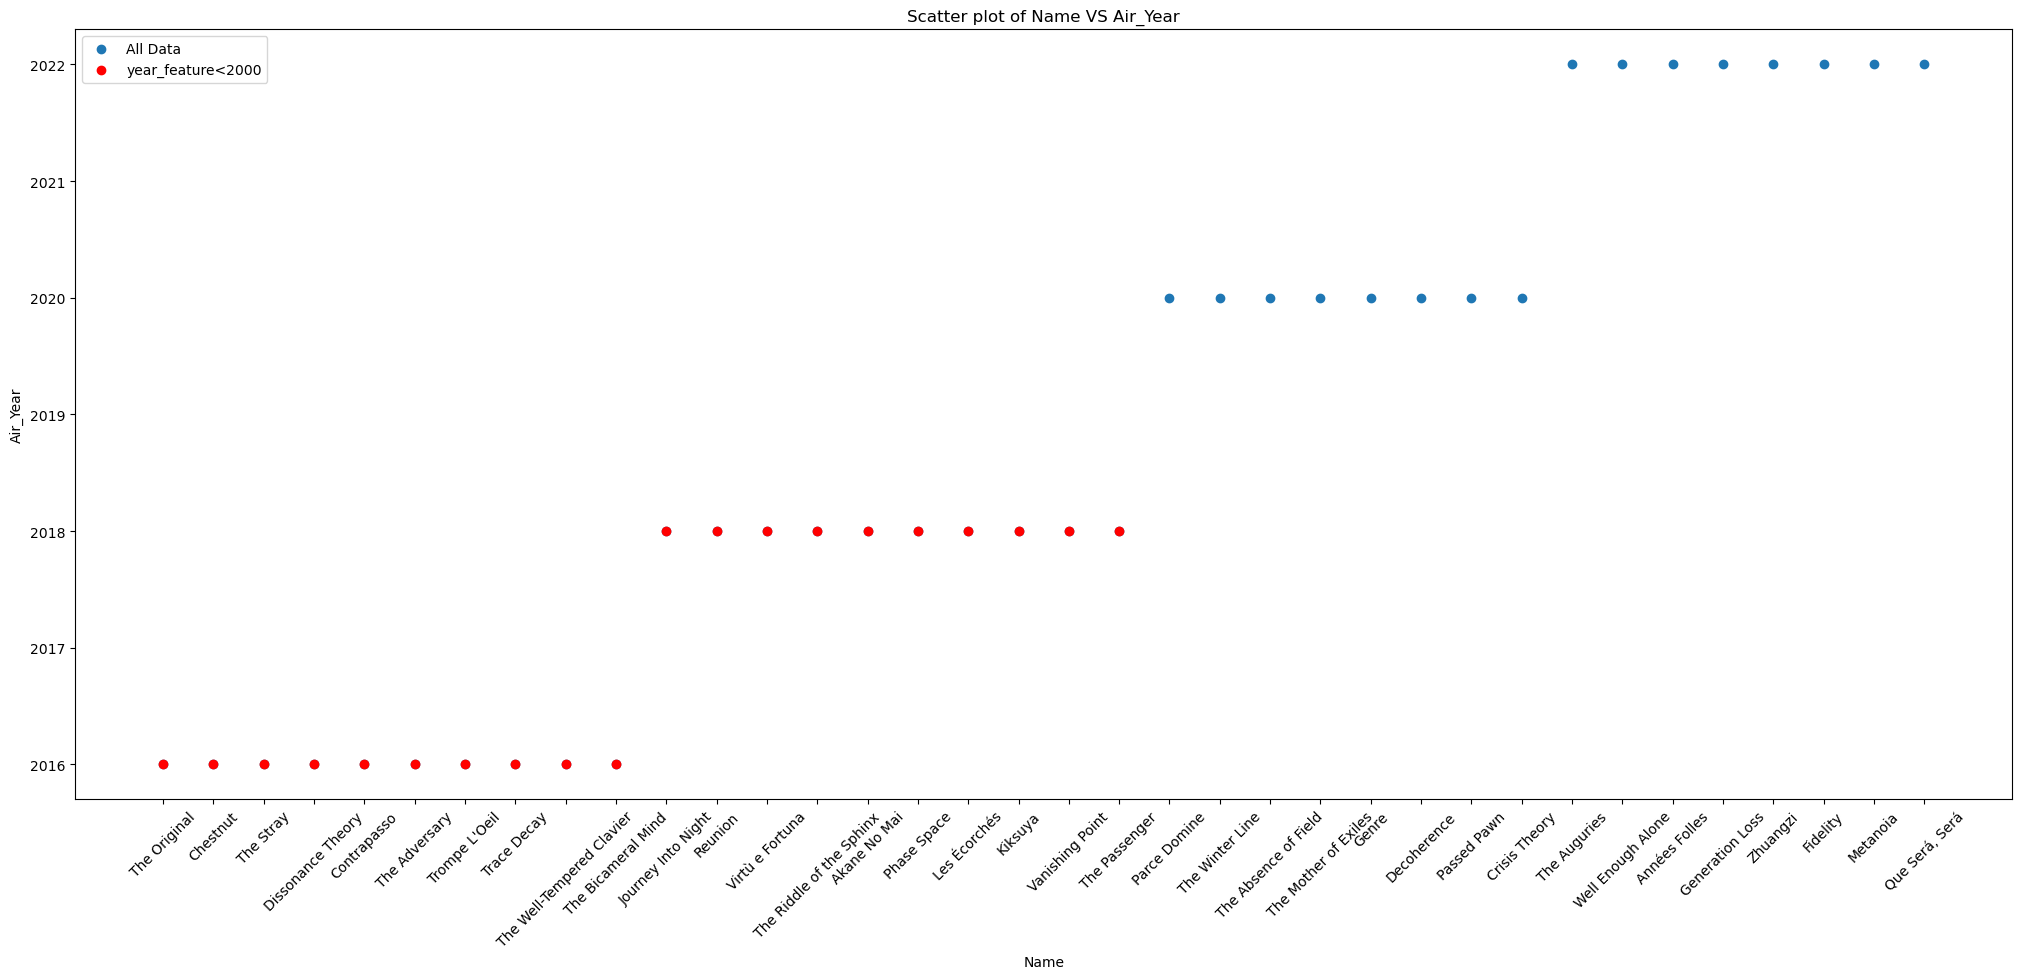

In [72]:
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['air_year'], label='All Data')
plt.scatter(df_prob3['name'], df_prob3['air_year'], color='red', label='year_feature<2000')
plt.xlabel('Name')
plt.ylabel('Air_Year')
plt.title('Scatter plot of Name VS Air_Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [73]:
df_prob3[['name','air_year']]

,name,air_year
0,The Original,2016
1,Chestnut,2016
2,The Stray,2016
3,Dissonance Theory,2016
4,Contrapasso,2016
5,The Adversary,2016
6,Trompe L'Oeil,2016
7,Trace Decay,2016
8,The Well-Tempered Clavier,2016
9,The Bicameral Mind,2016


#### Conclusion
There are total 20 episodes that aired before 2019

### Prob_4: Get the episode name from each season with the highest and lowest rating

In [119]:
highest_rating_episode = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()][['name','rating']])
lowest_rating_episode = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmin()][['name','rating']])
print("Episode with the highest rating in each season:\n")
print(highest_rating_episode)
print("\nEpisode with the lowest rating in each season:\n")
print(lowest_rating_episode)

Episode with the highest rating in each season:

                      name  rating
season                            
1       The Bicameral Mind     8.7
2                  Kiksuya     8.7
3             Parce Domine     8.0
4                 Zhuangzi     7.8

Episode with the lowest rating in each season:

                name  rating
season                      
1          The Stray     7.6
2       Akane No Mai     7.6
3        Decoherence     7.5
4       The Auguries     7.1


### Prob_5: Get the summary for the most popular ( ratings ) episode in every season

In [124]:
popular_episode_summary = df.groupby('season').apply(lambda x: x.loc[x['rating'].idxmax()]['summary'])
print("Summary of the most popular episode in each season:\n")
for season, summary in enumerate(popular_episode_summary):
    print(f"Season{season+1}: {summary}\n")

Summary of the most popular episode in each season:

Season1: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season2: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season3: If you're stuck in a loop, try walking in a straight line.

Season4: God is bored.

